In [1]:
# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing as prep

# other utilities
from sklearn import datasets, preprocessing, metrics

## Loading imports and data from the files

In [2]:
wqw = pd.read_excel('./winequality-white.xlsx', skiprows=1, index_col=None, na_values=['NA'])

In [3]:
wqw.shape

(4898, 12)

In [4]:
wqw.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2258,7.6,0.48,0.28,10.4,0.049,57.0,205.0,0.99748,3.24,0.45,9.3,5
2981,8.5,0.23,0.28,11.1,0.033,30.0,97.0,0.99507,3.03,0.39,10.5,7
2954,6.4,0.29,0.30,2.9,0.036,25.0,79.0,0.99037,3.29,0.60,12.4,7
316,6.8,0.25,0.34,4.7,0.031,34.0,134.0,0.99270,3.21,0.38,10.6,6
2259,7.2,0.39,0.54,1.4,0.157,34.0,132.0,0.99449,3.11,0.53,9.0,6
1625,6.4,0.26,0.49,6.4,0.037,37.0,161.0,0.99540,3.38,0.53,9.7,6
580,7.4,0.41,0.66,10.8,0.051,77.0,194.0,0.99760,3.05,0.46,8.7,5
4807,6.0,0.17,0.30,7.3,0.039,39.0,104.0,0.99252,2.91,0.57,11.0,6
2818,6.0,0.11,0.47,10.6,0.052,69.0,148.0,0.99580,2.91,0.34,9.3,4
4288,7.0,0.20,0.33,4.7,0.030,25.0,76.0,0.99202,2.88,0.54,10.5,6


In [5]:
wqr = pd.read_excel('./winequality-red.xlsx', skiprows=1, index_col=None, na_values=['NA'])

In [6]:
wqr.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1143,7.0,0.220,0.30,1.8,0.065,16.0,20.0,0.99672,3.61,0.82,10.0,6
1248,6.9,0.410,0.33,2.2,0.081,22.0,36.0,0.99490,3.41,0.75,11.1,6
1048,9.3,0.490,0.36,1.7,0.081,3.0,14.0,0.99702,3.27,0.78,10.9,6
1467,6.7,1.040,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0,4
85,6.9,0.550,0.15,2.2,0.076,19.0,40.0,0.99610,3.41,0.59,10.1,5
660,7.2,0.520,0.07,1.4,0.074,5.0,20.0,0.99730,3.32,0.81,9.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
249,7.3,0.660,0.00,2.0,0.084,6.0,23.0,0.99830,3.61,0.96,9.9,6
1260,8.6,0.635,0.68,1.8,0.403,19.0,56.0,0.99632,3.02,1.15,9.3,5
328,13.4,0.270,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,6


In [7]:
wqw.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
wqr.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
wqr['type']=0
wqw['type']=1

## Aggregate data and transforming categorical data into numerical 

In [10]:
wine = pd.concat([wqw, wqr], ignore_index=True)

In [11]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [12]:
wine.sample(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2111,6.5,0.22,0.25,17.1,0.050,44.0,138.0,1.00010,3.30,0.37,8.8,5,1
945,6.7,0.15,0.29,5.0,0.058,28.0,105.0,0.99460,3.52,0.44,10.2,7,1
21,6.4,0.31,0.38,2.9,0.038,19.0,102.0,0.99120,3.17,0.35,11.0,7,1
1938,7.2,0.16,0.35,1.2,0.031,27.0,84.0,0.99280,3.33,0.34,9.9,5,1
738,7.1,0.21,0.31,3.8,0.021,40.0,142.0,0.99215,3.17,0.39,10.8,7,1
6484,7.5,0.31,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4,6,0
543,6.7,0.24,0.41,8.7,0.036,29.0,148.0,0.99520,3.22,0.62,9.9,6,1
574,7.4,0.20,0.33,1.9,0.035,39.0,138.0,0.99100,3.17,0.44,11.7,7,1
1265,6.9,0.31,0.34,7.4,0.059,36.0,174.0,0.99630,3.46,0.62,11.1,7,1
2139,7.1,0.33,0.64,13.2,0.056,12.0,105.0,0.99720,3.05,0.39,9.2,5,1


In [13]:
wine.shape

(6497, 13)

## Calculating descriptive statistics for the data

In [14]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [15]:
wine.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
6494,6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


## Plotting diagrams to show outliers 

<Axes: >

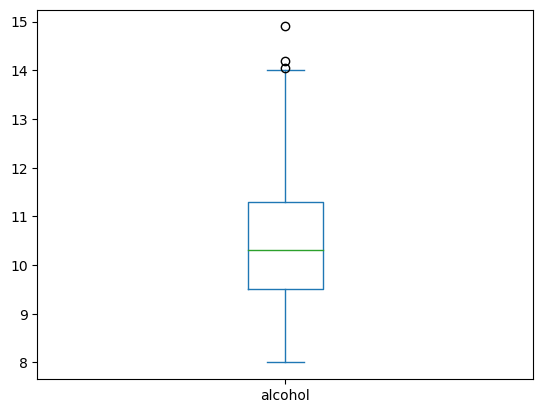

In [16]:
wine.alcohol.plot.box()

In [17]:
fw = wine[wine['alcohol'] > 14]
fw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3918,6.4,0.35,0.28,1.6,0.037,31.0,113.0,0.98779,3.12,0.40,14.20,7,1
4503,5.8,0.61,0.01,8.4,0.041,31.0,104.0,0.99090,3.26,0.72,14.05,7,1
5550,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.90,5,0


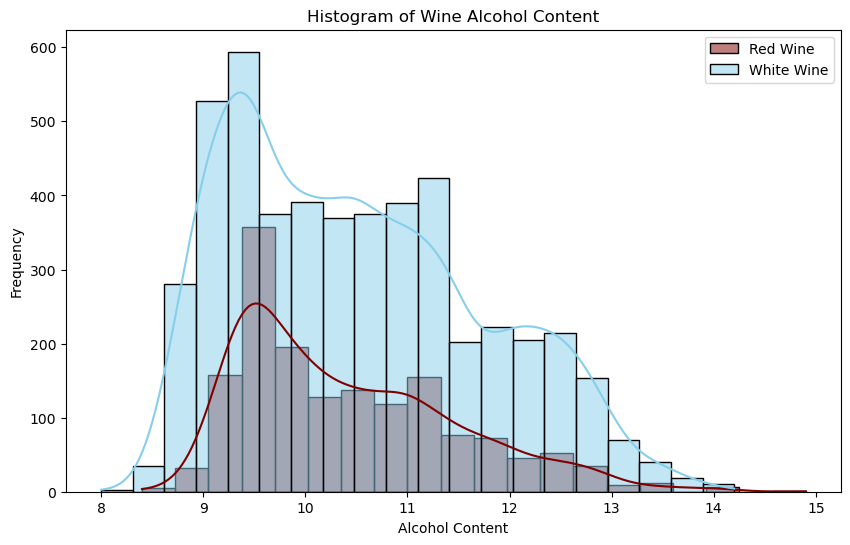

In [18]:
plt.figure(figsize=(10, 6))

sns.histplot(wine[wine['type'] == 0]['alcohol'], kde=True, bins=20, color='maroon', label='Red Wine')
sns.histplot(wine[wine['type'] == 1]['alcohol'], kde=True, bins=20, color='skyblue', label='White Wine')

plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.title('Histogram of Wine Alcohol Content')
plt.legend()

plt.show()

6a: Data is a bit skewed and not completely normalized

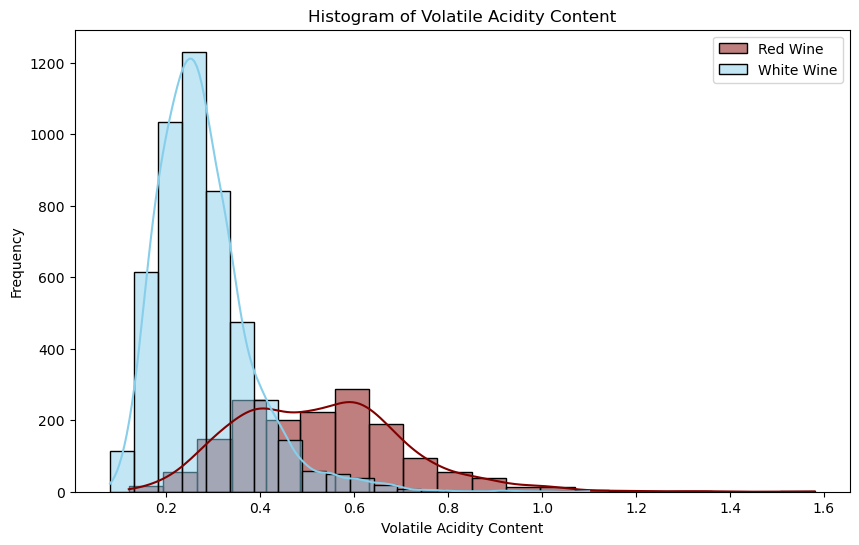

In [19]:
plt.figure(figsize=(10, 6))

sns.histplot(wine[wine['type'] == 0]['volatile acidity'], kde=True, bins=20, color='maroon', label='Red Wine')
sns.histplot(wine[wine['type'] == 1]['volatile acidity'], kde=True, bins=20, color='skyblue', label='White Wine')

plt.xlabel('Volatile Acidity Content')
plt.ylabel('Frequency')
plt.title('Histogram of Volatile Acidity Content')
plt.legend()

plt.show()

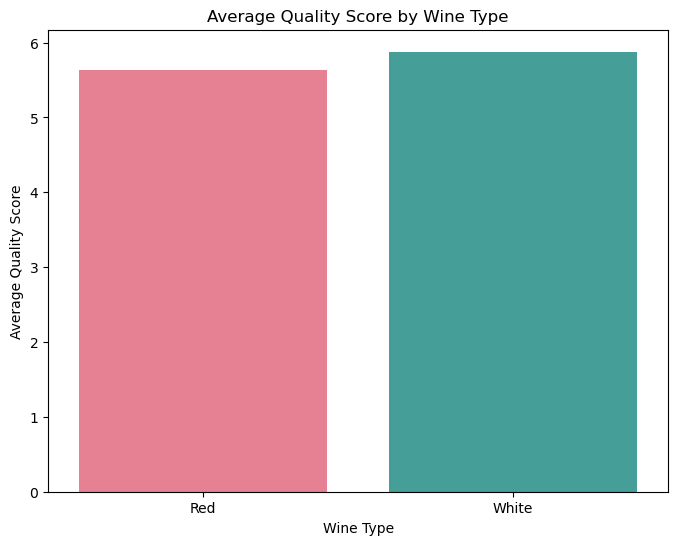

In [20]:
avg_quality_by_type = wine.groupby('type')['quality'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_quality_by_type, x='type', y='quality', palette='husl')
plt.xlabel('Wine Type')
plt.ylabel('Average Quality Score')
plt.title('Average Quality Score by Wine Type')
plt.xticks(ticks=[0, 1], labels=['Red', 'White'])

plt.show()

6b: White wine is shown to have a slightly higher quality than red wine

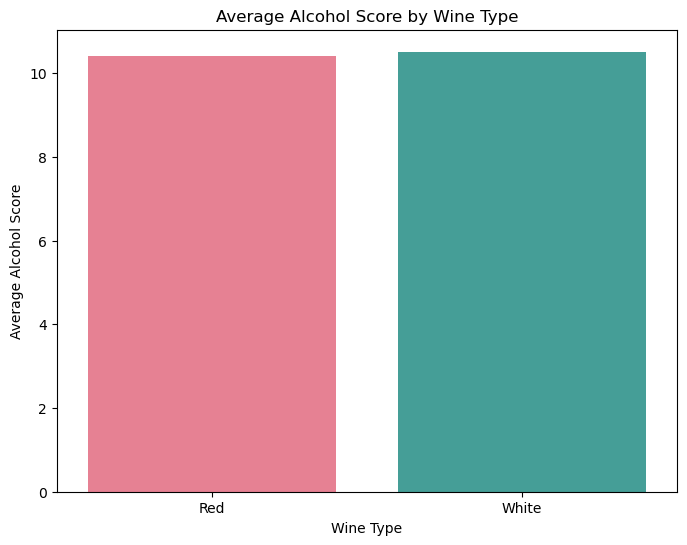

In [21]:
avg_alcohol_by_type = wine.groupby('type')['alcohol'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_alcohol_by_type, x='type', y='alcohol', palette='husl')
plt.xlabel('Wine Type')
plt.ylabel('Average Alcohol Score')
plt.title('Average Alcohol Score by Wine Type')
plt.xticks(ticks=[0, 1], labels=['Red', 'White'])

plt.show()

6c: White wine is shown to have a slightly higher alcohol percentage than red wine

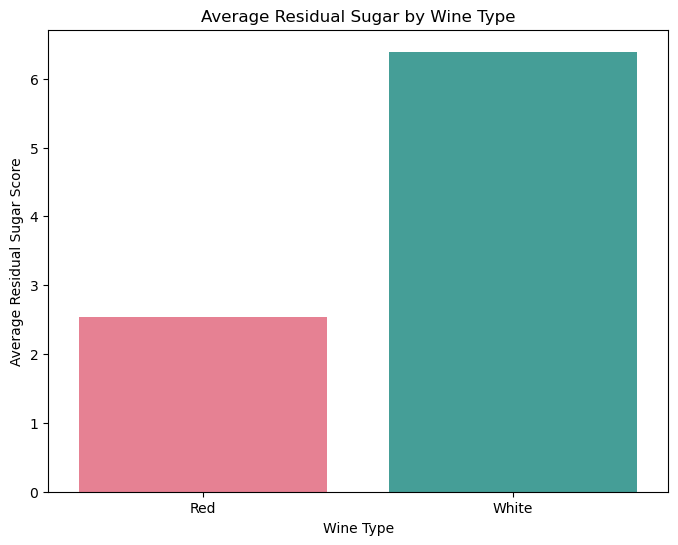

In [22]:
avg_residualSugar_by_type = wine.groupby('type')['residual sugar'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_residualSugar_by_type, x='type', y='residual sugar', palette='husl')
plt.xlabel('Wine Type')
plt.ylabel('Average Residual Sugar Score')
plt.title('Average Residual Sugar by Wine Type')
plt.xticks(ticks=[0, 1], labels=['Red', 'White'])

plt.show()

6d: White wine is shown have significantly higher amount of residual sugar content 

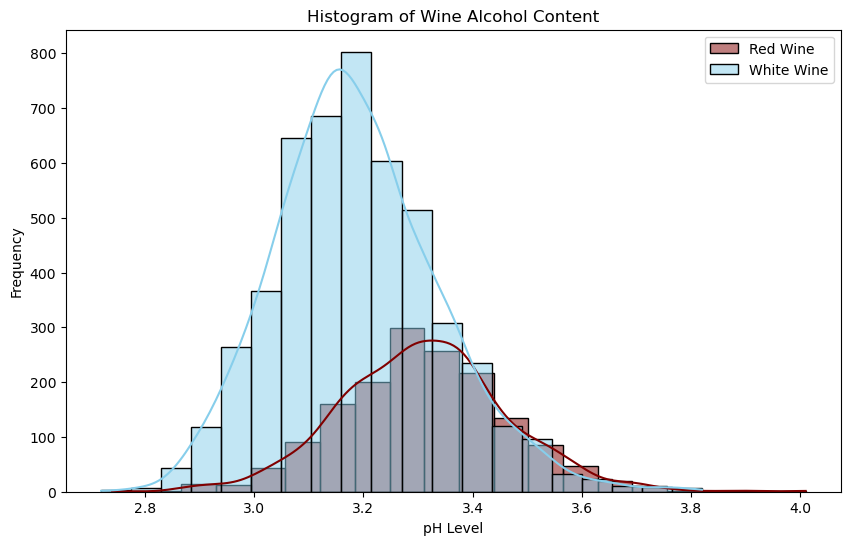

In [23]:
plt.figure(figsize=(10, 6))

sns.histplot(wine[wine['type'] == 0]['pH'], kde=True, bins=20, color='maroon', label='Red Wine')
sns.histplot(wine[wine['type'] == 1]['pH'], kde=True, bins=20, color='skyblue', label='White Wine')

plt.xlabel('pH Level')
plt.ylabel('Frequency')
plt.title('Histogram of Wine Alcohol Content')
plt.legend()

plt.show()

#### Wine consumers could be interested to find that red wine has a slightly higher average pH-level

In [24]:
qualityCorr = wine[['quality', 'alcohol']]
qualityCorr.corr()

,quality,alcohol
quality,1.000000,0.444319
alcohol,0.444319,1.000000


In [25]:
qualityCorr = wine[['quality', 'density']]
qualityCorr.corr()

,quality,density
quality,1.000000,-0.305858
density,-0.305858,1.000000


## Splitting data into subsets by binning the pH attribute

Text(0.5, 1.0, 'Histogram of pH Values')

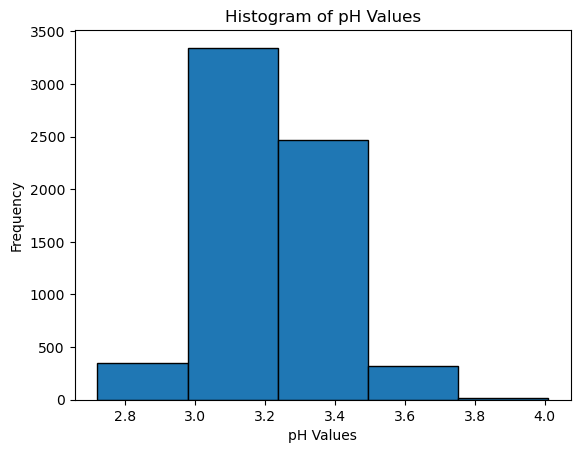

In [27]:
pH_values= wine['pH']
num_bins = 5 
bin_edges = np.linspace(wine['pH'].min(), wine['pH'].max(), num_bins + 1)
plt.hist(pH_values, bins=bin_edges, edgecolor='black')
plt.xlabel('pH Values')
plt.ylabel('Frequency')
plt.title('Histogram of pH Values')


## Using 10 subsets instead of 5

Text(0.5, 1.0, 'Histogram of pH Values')

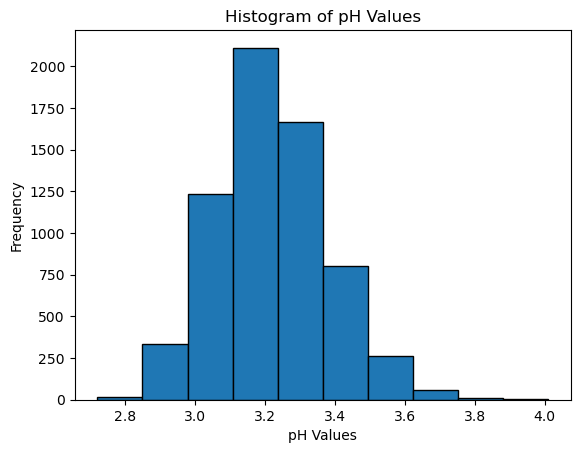

In [28]:
pH_values= wine['pH']
num_bins = 10
bin_edges = np.linspace(wine['pH'].min(), wine['pH'].max(), num_bins + 1)
plt.hist(pH_values, bins=bin_edges, edgecolor='black')
plt.xlabel('pH Values')
plt.ylabel('Frequency')
plt.title('Histogram of pH Values')

### Using 10 subsets makes the data look more normalized

In [29]:
winecorr=wine.corr()

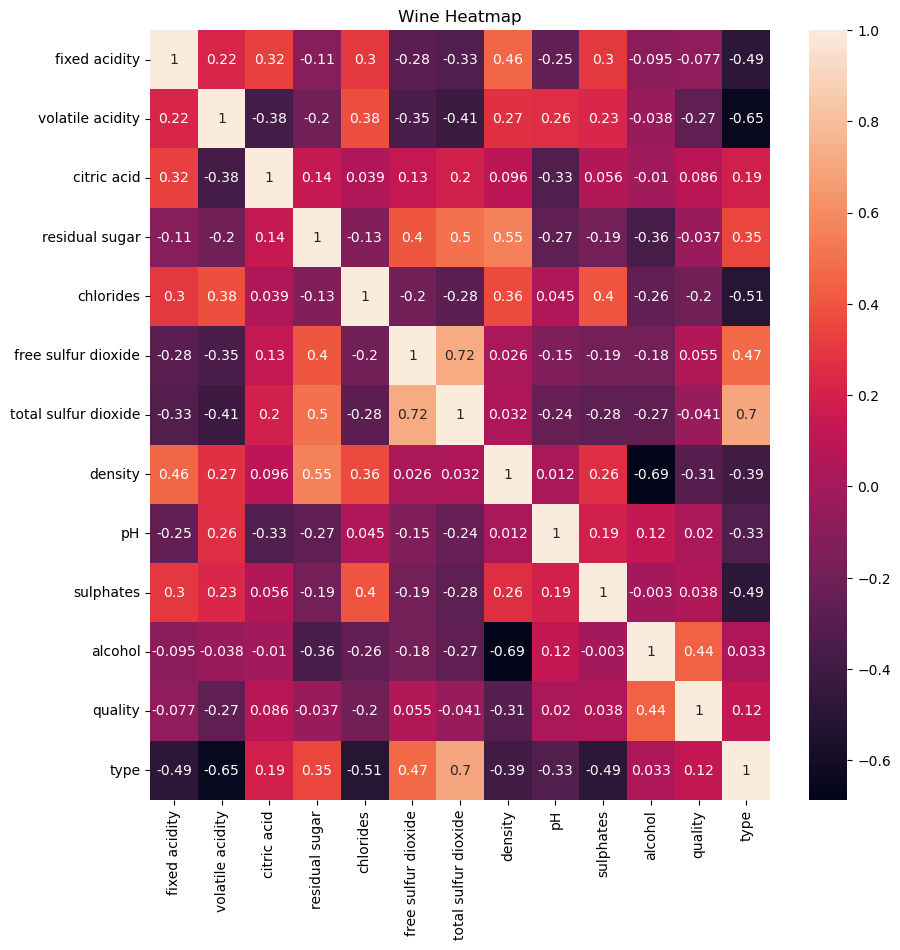

In [30]:
plt.figure(figsize = (10,10))
sns.heatmap(winecorr, annot=True)

plt.title('Wine Heatmap')

plt.show()

## From the heatmap, we can tell that alcohol has the highest correlation with quality
## Volatile acidity has the lowest correlation

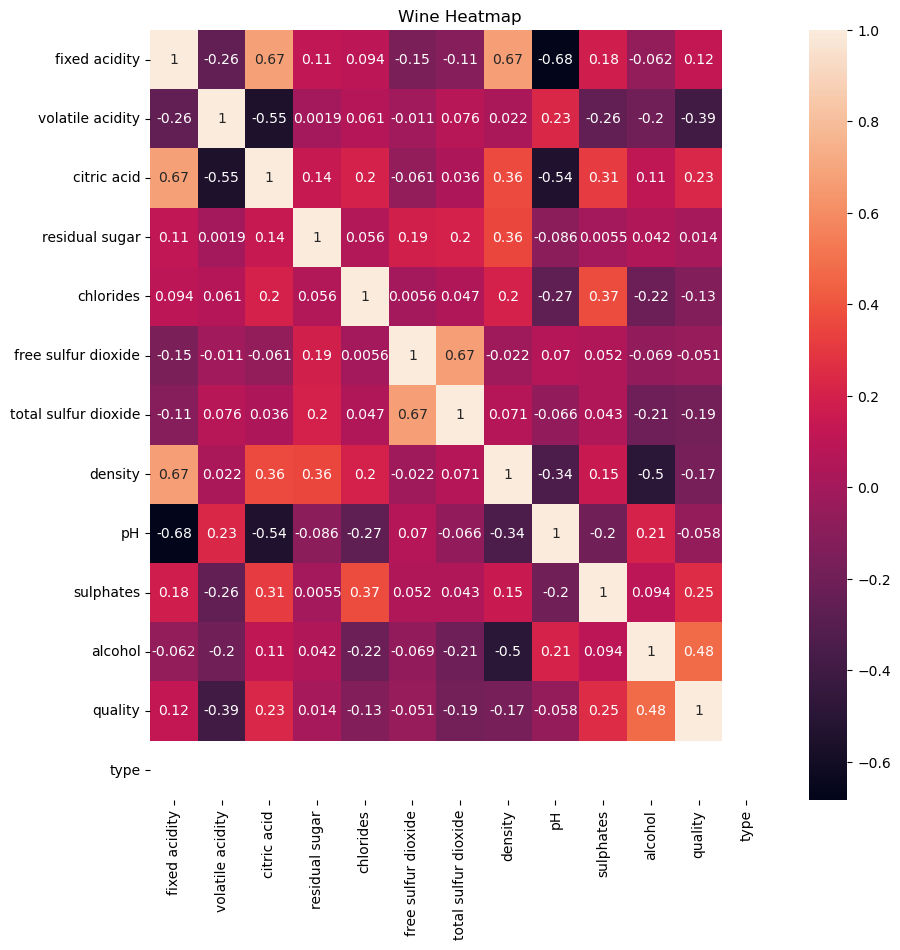

In [44]:
plt.figure(figsize = (10,10))
sns.heatmap(wqr.corr(), annot=True)

plt.title('Wine Heatmap')

plt.show()

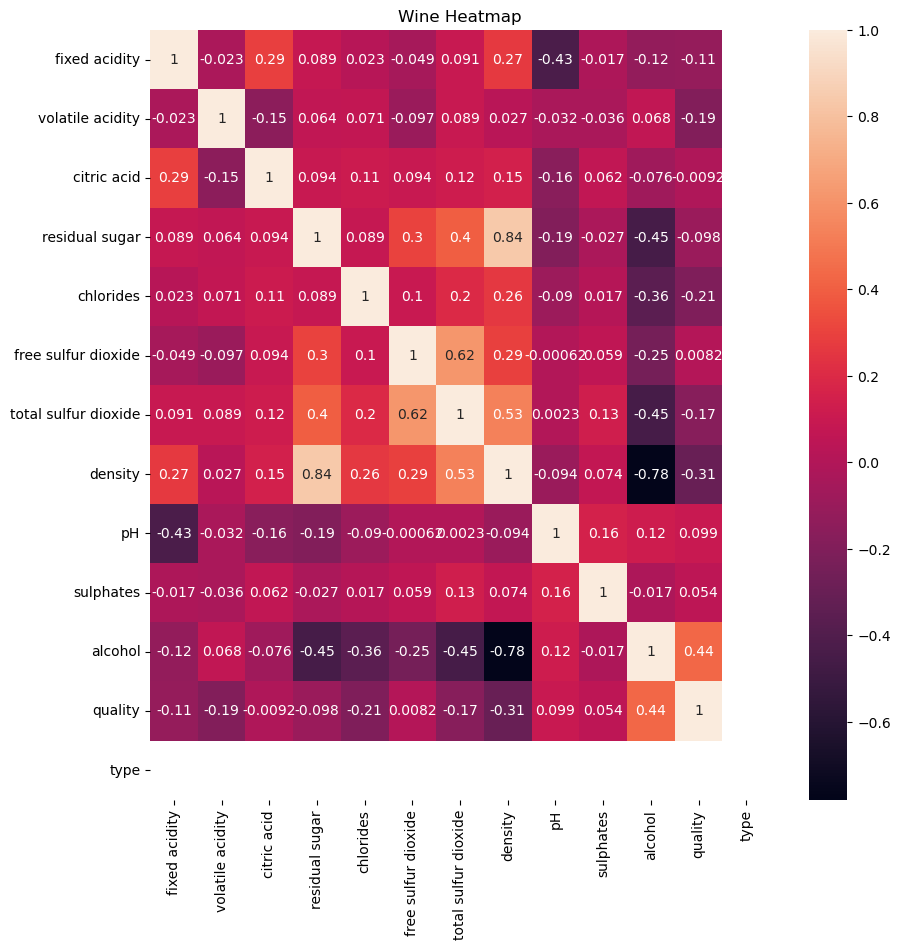

In [45]:
plt.figure(figsize = (10,10))
sns.heatmap(wqw.corr(), annot=True)

plt.title('Wine Heatmap')

plt.show()

#### Looking at the different heatmaps for red and white, they differ with correlation to quality. While both still have the highest correlation to alcohol, red still has lowest correlation with volatile acidity, but white has a lower correlation with density

<Axes: >

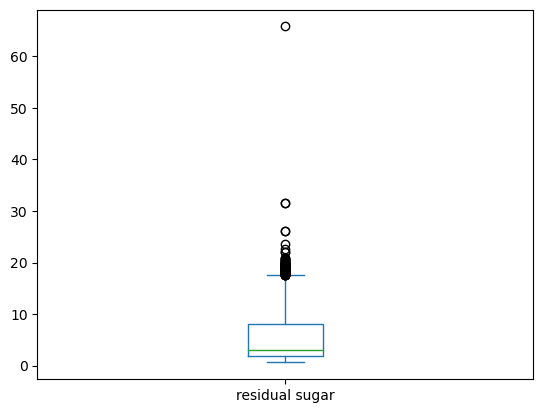

In [31]:
wine['residual sugar'].plot.box()

## Showing outliers 

In [32]:
residualSugar = wine['residual sugar'].sort_values(ascending = False)
residualSugar.head(5)

2781    65.80
1663    31.60
1653    31.60
3623    26.05
3619    26.05
Name: residual sugar, dtype: float64

In [33]:
#wine= wine.drop(2781)
#wine.reset_index()

### Removing the outlier

In [46]:
wine = wine.drop('pH', axis = 1)

KeyError: "['pH'] not found in axis"

### By looking at the previous heatmaps, we see that pH has the least correlation with wine correlation

In [35]:
wine = wine.drop('type', axis = 1)
values = wine.values
values

array([[ 7.   ,  0.27 ,  0.36 , ...,  0.45 ,  8.8  ,  6.   ],
       [ 6.3  ,  0.3  ,  0.34 , ...,  0.49 ,  9.5  ,  6.   ],
       [ 8.1  ,  0.28 ,  0.4  , ...,  0.44 , 10.1  ,  6.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [36]:
 from sklearn.preprocessing import StandardScaler
normalized_values = prep.normalize(values, norm = 'l1')
normalized_values

array([[0.02696186, 0.00103996, 0.00138661, ..., 0.00173326, 0.03389491,
        0.02311017],
       [0.03671906, 0.00174853, 0.00198166, ..., 0.00285593, 0.05537002,
        0.03497054],
       [0.05054126, 0.00174711, 0.00249586, ..., 0.00274545, 0.06302058,
        0.03743797],
       ...,
       [0.06490714, 0.00525439, 0.00133935, ..., 0.00772704, 0.11332993,
        0.06181632],
       [0.05804489, 0.00634559, 0.00118057, ..., 0.00698506, 0.10034879,
        0.04919058],
       [0.06733819, 0.00347914, 0.00527482, ..., 0.0074072 , 0.12345334,
        0.06733819]])

## Transforming our data in normalized values

In [37]:
np.mean(normalized_values)

0.09090909090909091

In [38]:
np.std(normalized_values)

0.17857574554970648

[8.14425879e-01 1.54195440e-01 2.24514006e-02 6.96333895e-03
 1.65968141e-03 1.75545123e-04 7.80221710e-05 3.29489072e-05
 1.42654817e-05 3.47873466e-06 4.51285607e-32]


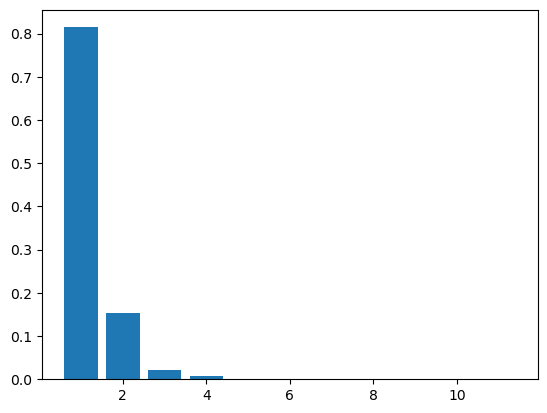

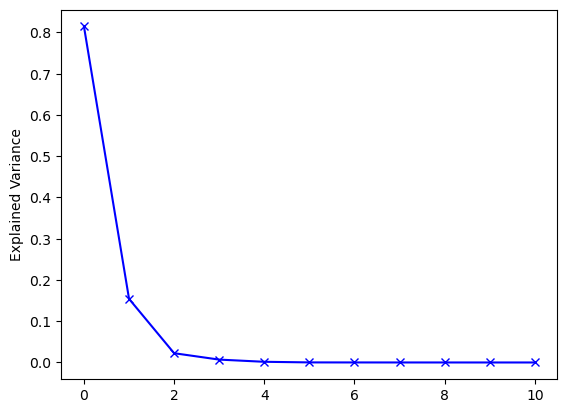

In [39]:
normalized_wine = pd.DataFrame(normalized_values, columns = wine.columns)
from sklearn.decomposition import PCA 
c = 11
pca = PCA(n_components = c)
pca.fit_transform(normalized_wine)
print(pca.explained_variance_ratio_)
plt.bar(range(1,c+1), pca.explained_variance_ratio_)
plt.show()
plt.plot(pca.explained_variance_ratio_, 'bx-')
plt.ylabel('Explained Variance')
plt.show()

## The optimal number of components is about 3, if we go lower we would lose a bunch of data

In [40]:
c = 3
pca_final = PCA(n_components = c)
pca_wine = pca_final.fit_transform(normalized_wine)
normalized_wine = pd.DataFrame(pca_wine, columns=['PC 1','PC 2','PC 3'])
normalized_wine.sample(10)

,PC 1,PC 2,PC 3
4364,-0.021269,0.030049,0.023338
195,-0.040694,0.112277,-0.013156
2218,-0.114195,-0.036950,0.003104
3652,-0.101715,-0.058861,-0.021429
5628,0.166071,-0.019817,-0.004385
1428,0.029363,0.036595,-0.023207
3749,-0.059253,0.024379,0.003929
4740,-0.101172,0.046250,-0.021382
4249,-0.106590,0.007937,-0.018817
1440,-0.038568,0.064879,0.029630
